In [157]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1 align="center"> Naive Testing </h1>
<h3 align="center"> Christine Zhang </h3>

---

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import pickle
from scipy import stats 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

### Combined Mutation and Copy number 

---

In [2]:
file_name = "datamaster"
file_object = open(file_name,'r')  
compiled_pd = pickle.load(file_object)
print np.shape(compiled_pd)
compiled_pd.head()

(472, 24705)


Entrez_id,1,503538,29974,2,144571,144568,3,53947,51146,100506677,...,8522_y,2885_y,2161_y,27255_y,23072_y,6725_y,9149_y,6241_y,8301_y,AUC
3,-0.0324,-0.0324,-0.4928,-0.0657,-0.0657,-0.0657,-0.0657,-0.0390,0.0518,0.4291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.473
7,-0.0762,-0.0762,-0.0025,0.4486,0.4486,0.4486,0.4486,-0.0574,-0.0303,-0.0712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.142
10,0.0346,0.0346,-0.0522,-0.3816,-0.3816,-0.3816,-0.3816,-0.0155,-0.2675,-0.7758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.380
15,0.2934,0.2934,-0.3050,0.1603,0.1603,0.1603,0.1603,-0.2881,0.2831,0.0613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.374
16,0.0463,0.0463,0.0436,-0.0112,-0.0112,-0.0112,-0.0112,0.0834,0.0468,0.0528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.123


In [6]:
no_auc_pd = compiled_pd.drop(["AUC"], axis = 1)
no_auc = no_auc_pd.as_matrix()
print np.shape(no_auc)
no_auc_pd.head()

(472, 24704)


Entrez_id,1,503538,29974,2,144571,144568,3,53947,51146,100506677,...,6608_y,8522_y,2885_y,2161_y,27255_y,23072_y,6725_y,9149_y,6241_y,8301_y
3,-0.0324,-0.0324,-0.4928,-0.0657,-0.0657,-0.0657,-0.0657,-0.0390,0.0518,0.4291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.0762,-0.0762,-0.0025,0.4486,0.4486,0.4486,0.4486,-0.0574,-0.0303,-0.0712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0346,0.0346,-0.0522,-0.3816,-0.3816,-0.3816,-0.3816,-0.0155,-0.2675,-0.7758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.2934,0.2934,-0.3050,0.1603,0.1603,0.1603,0.1603,-0.2881,0.2831,0.0613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0463,0.0463,0.0436,-0.0112,-0.0112,-0.0112,-0.0112,0.0834,0.0468,0.0528,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
file_name = "master_no_auc"
with open(file_name,'wb') as my_file_obj:
    pickle.dump(no_auc_pd,my_file_obj)

In [31]:
auc_pd = compiled_pd["AUC"]
auc = auc_pd.as_matrix()
auc = auc.reshape([472,1])
print np.shape(auc)
auc_pd.head()

(472, 1)


3     2.473
7     2.142
10    3.380
15    3.374
16    3.123
Name: AUC, dtype: float64

In [26]:
file_name = "master_auc"
with open(file_name,'wb') as my_file_obj:
    pickle.dump(auc_pd,my_file_obj)

In [27]:
linreg = LinearRegression()
svr = SVR()
rf = RandomForestRegressor()

# test naive models
def test_model (model):
    clf = model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    r2 = clf.score(x_test, y_test)
    return y_pred, r2

def draw_plot (ax, y_pred, title, y_score):
    y_pred = y_pred.flatten()
    ax.scatter(y_pred, y_test)
    ax.plot(np.unique(y_pred), np.poly1d(np.polyfit(y_pred, y_test, 1))(np.unique(y_pred)))
    ax.set_title("%s r2 accuracy: %s" %(title, round(y_score, 3)))
    ax.set_xlabel("Predicted AUC")
    ax.set_ylabel("Actual AUC")
    return plt

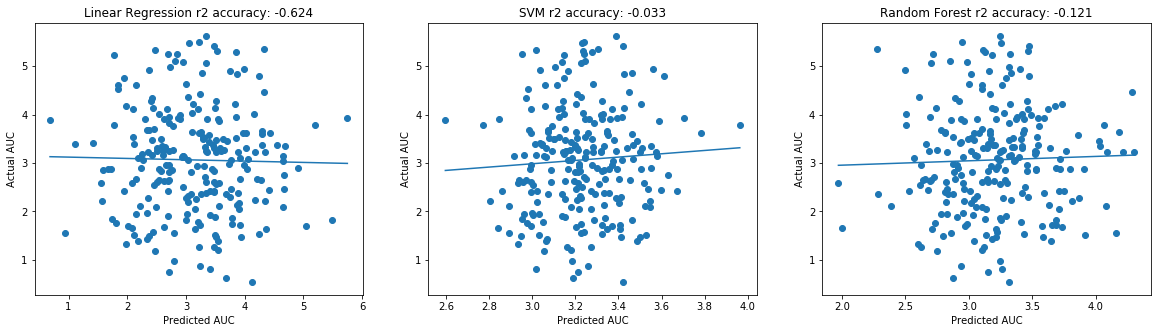

In [29]:
x_train, x_test, y_train, y_test = train_test_split(no_auc, auc, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred, linreg_r2 = test_model (linreg)
svr_y_pred, svr_r2 = test_model (svr)
rf_y_pred, rf_r2 = test_model (rf)

fig_all, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0] = draw_plot (ax[0], linreg_y_pred, "Linear Regression", linreg_r2)
ax[1] = draw_plot (ax[1], svr_y_pred, "SVM", svr_r2)
ax[2] = draw_plot (ax[2], rf_y_pred, "Random Forest", rf_r2)

### Just Mutation

---

In [42]:
file_name = "mutation_pd"
file_object = open(file_name,'r')  
mutation_pd = pickle.load(file_object)
print np.shape(mutation_pd)
mutation_pd.head()

(472, 1530)


Entrez_id,890,4478,2317,6790,120892,4342,4739,6498,8313,10298,...,6608,8522,2885,2161,27255,23072,6725,9149,6241,8301
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


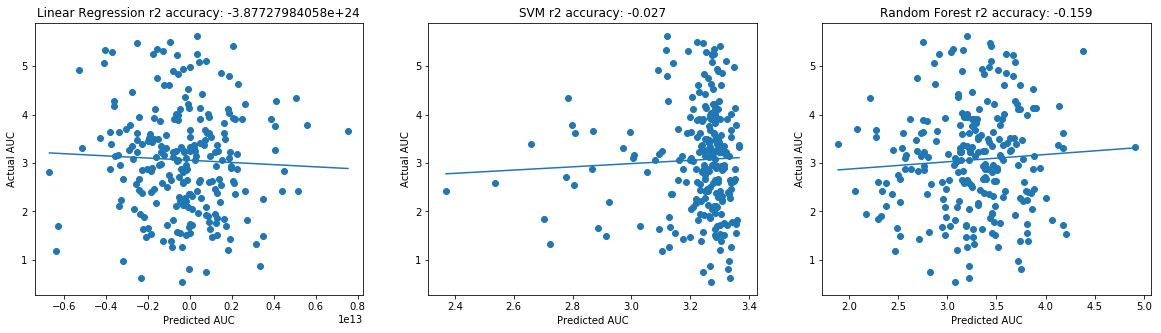

In [44]:
x_train, x_test, y_train, y_test = train_test_split(just_mutation_pd, auc, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_mut, linreg_r2_mut = test_model (linreg)
svr_y_pred_mut, svr_r2_mut = test_model (svr)
rf_y_pred_mut, rf_r2_mut = test_model (rf)

fig_mut, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0] = draw_plot (ax[0], linreg_y_pred_mut, "Linear Regression", linreg_r2_mut)
ax[1] = draw_plot (ax[1], svr_y_pred_mut, "SVM", svr_r2_mut)
ax[2] = draw_plot (ax[2], rf_y_pred_mut, "Random Forest", rf_r2_mut)

### Just Copy Number

---

In [45]:
file_name = "copynum_pd"
file_object = open(file_name,'r')  
copynum_pd = pickle.load(file_object)
print np.shape(copynum_pd)
copynum_pd.head()

(472, 23174)


Entrez_id,1,503538,29974,2,144571,144568,3,53947,51146,100506677,...,90834,91149,91316,91450,91948,92249,92973,93432,93622,96610
3,-0.0324,-0.0324,-0.4928,-0.0657,-0.0657,-0.0657,-0.0657,-0.0390,0.0518,0.4291,...,-0.0390,0.0865,0.3492,-0.0328,0.0134,0.0068,0.3753,0.3447,-0.5221,0.3231
7,-0.0762,-0.0762,-0.0025,0.4486,0.4486,0.4486,0.4486,-0.0574,-0.0303,-0.0712,...,-0.0574,-0.9972,0.0626,-0.0705,-0.0705,-0.0164,-0.0542,0.4749,-0.0770,0.0626
10,0.0346,0.0346,-0.0522,-0.3816,-0.3816,-0.3816,-0.3816,-0.0155,-0.2675,-0.7758,...,-0.0155,0.3231,-0.0227,0.0947,0.1348,0.3855,-0.2897,-0.4246,-0.0198,0.0390
15,0.2934,0.2934,-0.3050,0.1603,0.1603,0.1603,0.1603,-0.2881,0.2831,0.0613,...,-0.4840,-0.2420,-0.4661,-0.3308,-0.3570,-0.0185,-0.2710,-0.4542,-0.3288,-0.4152
16,0.0463,0.0463,0.0436,-0.0112,-0.0112,-0.0112,-0.0112,0.0834,0.0468,0.0528,...,0.0834,0.0290,0.1263,0.0286,0.0330,0.0037,0.0684,0.0400,0.0982,0.1263


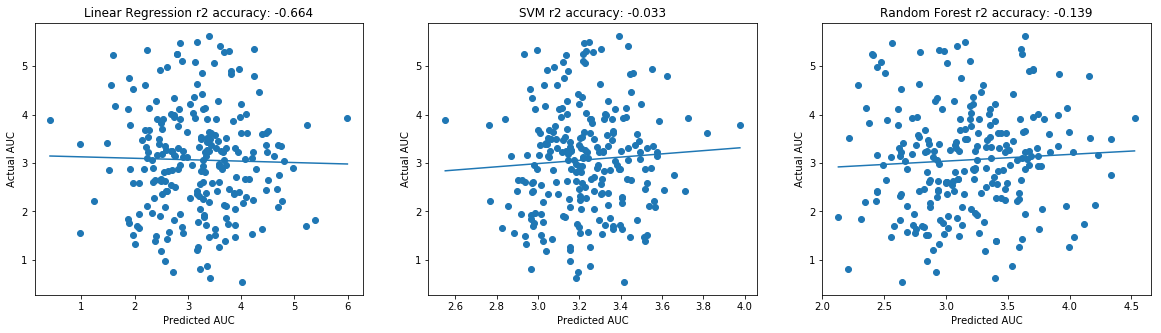

In [47]:
x_train, x_test, y_train, y_test = train_test_split(copynum_pd, auc, test_size=0.5, random_state=42)
y_test = y_test.flatten()
y_train = y_train.flatten()

# calculated r_2 values
linreg_y_pred_cn, linreg_r2_cn = test_model (linreg)
svr_y_pred_cn, svr_r2_cn = test_model (svr)
rf_y_pred_cn, rf_r2_cn = test_model (rf)

fig_cn, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0] = draw_plot (ax[0], linreg_y_pred_cn, "Linear Regression", linreg_r2_cn)
ax[1] = draw_plot (ax[1], svr_y_pred_cn, "SVM", svr_r2_cn)
ax[2] = draw_plot (ax[2], rf_y_pred_cn, "Random Forest", rf_r2_cn)

In [49]:
score_df = pd.DataFrame({'Linear Regression': [linreg_r2, linreg_r2_mut, linreg_r2_cn],
                         'Support Vector Machine': [svr_r2,svr_r2_mut, svr_r2_cn],
                         'Random Forest': [rf_r2, rf_r2_mut, rf_r2_cn]}, 
                       index=["All", "Mutation", "Copy Number"])
score_df

,Linear Regression,Random Forest,Support Vector Machine
All,-6.241467e-01,-0.121399,-0.032925
Mutation,-3.877280e+24,-0.159281,-0.026937
Copy Number,-6.642773e-01,-0.139039,-0.033177
